# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import random
import pylab
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data = data = pd.read_csv("D:\\Projects\\ML_SLR\\data.txt")

In [25]:
data.head(5)

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [4]:
data_new = pd.DataFrame()

In [5]:
data_new[['population','profit']] = data

In [27]:
data_new.head(5)

,population,profit
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [7]:
x = data_new['population']


In [8]:
y = data_new['profit']
y.shape

(96L,)

C:\Users\Administrator\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


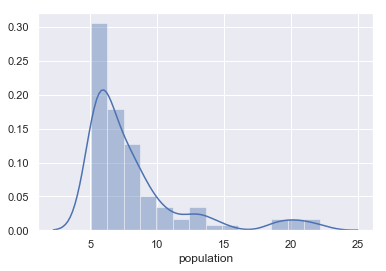

In [9]:
sns.distplot(x)

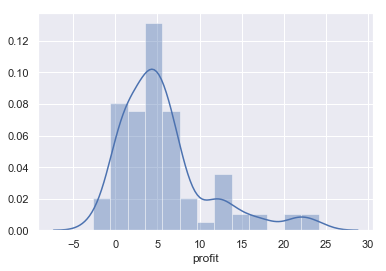

In [10]:
sns.distplot(y)

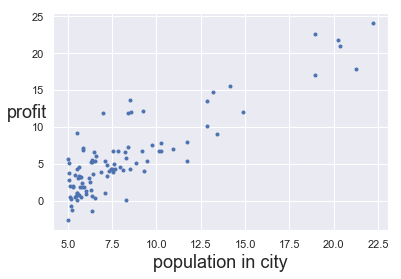

In [11]:
plt.plot(x,y,'b.')
plt.xlabel("population in city", fontsize=18)
plt.ylabel("profit", rotation=0, fontsize=18)
plt.show()

# #Analytical way of Linear Regression

In [12]:

from sklearn.linear_model import LinearRegression

In [13]:
x_matrix = x.values.reshape(-1,1)


In [14]:
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
A_theta0 = reg.intercept_
A_theta1 = reg.coef_
print'A_theta0 :',A_theta0 ,'A_theta1 :',A_theta1

A_theta0 : -4.2115040054240875 A_theta1 : [1.21354725]


In [16]:
A_theta = np.ones(2)
A_x = np.array(x)
m = x.shape[0]
A_x.shape = (m,1)
A_x = np.c_[ np.ones(m), A_x]
A_hypothesis = np.dot(A_x, A_theta)
A_loss = A_hypothesis - y
A_cost = np.sum(A_loss ** 2) / (2 * m)  # cost
print('Analytical Cost is ' ,A_cost)

('Analytical Cost is ', 9.801222644366666)


In [17]:
for i in range(len(x)):
        A_y_predict = A_theta0 + A_theta1*x 

In [18]:
A_y_predict.head(5)

0    2.496621
1    6.126220
2    4.287210
3    2.899640
4    5.961541
Name: population, dtype: float64

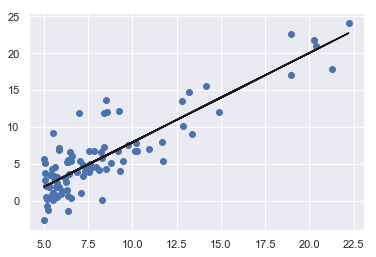

In [19]:
pylab.plot(x,y,'o')
pylab.plot(x,A_y_predict,'k-')
pylab.show()


In [20]:
x = np.array(x) # conver x variable into array
m = x.shape[0] #assign m with number of rows
x.shape = (m,1) # add another dimension to our data to accommodate the intercept
x.shape

(96L, 1L)

In [21]:
def gradient_descent(alpha, x, y, numIterations):
    m = x.shape[0] # number of samples
    theta = np.ones(2) #initialize theta to zeros
    cost_history = np.zeros(numIterations) # creating variables for cost history
    theta_history = np.zeros((numIterations,2)) # creating variables for theta history
    x_transpose = x.transpose() # transpose x
    for iter in range(0, numIterations): # a loop from zero to number of iterations
        hypothesis = np.dot(x, theta) # dot product
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # cost function calculation
        cost_history[iter] = J 
        print "iter %s | J: %.3f" % (iter, J) # print cost function with iteration      
        gradient = np.dot(x_transpose, loss) / m   # calculate gradient      
        theta = theta - alpha * gradient  # update theta
        theta_history[iter,:] =theta.T
    return theta , cost_history , theta_history

if __name__ == '__main__':

   
    m, n = np.shape(x) 
    x = np.c_[ np.ones(m), x] # insert column
    alpha = 0.02 # learning rate
    numIterations = 1500 # number of iteration
    theta,cost_history,theta_history = gradient_descent(alpha, x, y, numIterations)
    print('theta0 - ' ,theta[0],'  theta1 - ' ,theta[1])
 
   

iter 0 | J: 9.801
iter 1 | J: 7.554
iter 2 | J: 6.583
iter 3 | J: 6.159
iter 4 | J: 5.968
iter 5 | J: 5.876
iter 6 | J: 5.827
iter 7 | J: 5.797
iter 8 | J: 5.774
iter 9 | J: 5.755
iter 10 | J: 5.738
iter 11 | J: 5.721
iter 12 | J: 5.704
iter 13 | J: 5.688
iter 14 | J: 5.672
iter 15 | J: 5.656
iter 16 | J: 5.640
iter 17 | J: 5.624
iter 18 | J: 5.609
iter 19 | J: 5.593
iter 20 | J: 5.578
iter 21 | J: 5.562
iter 22 | J: 5.547
iter 23 | J: 5.532
iter 24 | J: 5.517
iter 25 | J: 5.502
iter 26 | J: 5.488
iter 27 | J: 5.473
iter 28 | J: 5.459
iter 29 | J: 5.444
iter 30 | J: 5.430
iter 31 | J: 5.416
iter 32 | J: 5.402
iter 33 | J: 5.388
iter 34 | J: 5.374
iter 35 | J: 5.360
iter 36 | J: 5.346
iter 37 | J: 5.333
iter 38 | J: 5.319
iter 39 | J: 5.306
iter 40 | J: 5.292
iter 41 | J: 5.279
iter 42 | J: 5.266
iter 43 | J: 5.253
iter 44 | J: 5.240
iter 45 | J: 5.227
iter 46 | J: 5.214
iter 47 | J: 5.202
iter 48 | J: 5.189
iter 49 | J: 5.177
iter 50 | J: 5.164
iter 51 | J: 5.152
iter 52 | J: 5.140
ite

iter 429 | J: 3.569
iter 430 | J: 3.569
iter 431 | J: 3.568
iter 432 | J: 3.567
iter 433 | J: 3.566
iter 434 | J: 3.565
iter 435 | J: 3.565
iter 436 | J: 3.564
iter 437 | J: 3.563
iter 438 | J: 3.562
iter 439 | J: 3.562
iter 440 | J: 3.561
iter 441 | J: 3.560
iter 442 | J: 3.560
iter 443 | J: 3.559
iter 444 | J: 3.558
iter 445 | J: 3.557
iter 446 | J: 3.557
iter 447 | J: 3.556
iter 448 | J: 3.555
iter 449 | J: 3.555
iter 450 | J: 3.554
iter 451 | J: 3.553
iter 452 | J: 3.553
iter 453 | J: 3.552
iter 454 | J: 3.551
iter 455 | J: 3.551
iter 456 | J: 3.550
iter 457 | J: 3.549
iter 458 | J: 3.549
iter 459 | J: 3.548
iter 460 | J: 3.547
iter 461 | J: 3.547
iter 462 | J: 3.546
iter 463 | J: 3.545
iter 464 | J: 3.545
iter 465 | J: 3.544
iter 466 | J: 3.544
iter 467 | J: 3.543
iter 468 | J: 3.542
iter 469 | J: 3.542
iter 470 | J: 3.541
iter 471 | J: 3.541
iter 472 | J: 3.540
iter 473 | J: 3.539
iter 474 | J: 3.539
iter 475 | J: 3.538
iter 476 | J: 3.538
iter 477 | J: 3.537
iter 478 | J: 3.537


iter 864 | J: 3.464
iter 865 | J: 3.464
iter 866 | J: 3.464
iter 867 | J: 3.464
iter 868 | J: 3.464
iter 869 | J: 3.464
iter 870 | J: 3.464
iter 871 | J: 3.464
iter 872 | J: 3.464
iter 873 | J: 3.464
iter 874 | J: 3.464
iter 875 | J: 3.464
iter 876 | J: 3.464
iter 877 | J: 3.464
iter 878 | J: 3.464
iter 879 | J: 3.464
iter 880 | J: 3.464
iter 881 | J: 3.464
iter 882 | J: 3.464
iter 883 | J: 3.464
iter 884 | J: 3.464
iter 885 | J: 3.464
iter 886 | J: 3.464
iter 887 | J: 3.464
iter 888 | J: 3.464
iter 889 | J: 3.464
iter 890 | J: 3.463
iter 891 | J: 3.463
iter 892 | J: 3.463
iter 893 | J: 3.463
iter 894 | J: 3.463
iter 895 | J: 3.463
iter 896 | J: 3.463
iter 897 | J: 3.463
iter 898 | J: 3.463
iter 899 | J: 3.463
iter 900 | J: 3.463
iter 901 | J: 3.463
iter 902 | J: 3.463
iter 903 | J: 3.463
iter 904 | J: 3.463
iter 905 | J: 3.463
iter 906 | J: 3.463
iter 907 | J: 3.463
iter 908 | J: 3.463
iter 909 | J: 3.463
iter 910 | J: 3.463
iter 911 | J: 3.463
iter 912 | J: 3.463
iter 913 | J: 3.463


iter 1283 | J: 3.460
iter 1284 | J: 3.460
iter 1285 | J: 3.460
iter 1286 | J: 3.460
iter 1287 | J: 3.460
iter 1288 | J: 3.460
iter 1289 | J: 3.460
iter 1290 | J: 3.460
iter 1291 | J: 3.460
iter 1292 | J: 3.460
iter 1293 | J: 3.460
iter 1294 | J: 3.460
iter 1295 | J: 3.460
iter 1296 | J: 3.460
iter 1297 | J: 3.460
iter 1298 | J: 3.460
iter 1299 | J: 3.460
iter 1300 | J: 3.460
iter 1301 | J: 3.460
iter 1302 | J: 3.460
iter 1303 | J: 3.460
iter 1304 | J: 3.460
iter 1305 | J: 3.460
iter 1306 | J: 3.460
iter 1307 | J: 3.460
iter 1308 | J: 3.460
iter 1309 | J: 3.460
iter 1310 | J: 3.460
iter 1311 | J: 3.460
iter 1312 | J: 3.460
iter 1313 | J: 3.460
iter 1314 | J: 3.460
iter 1315 | J: 3.460
iter 1316 | J: 3.460
iter 1317 | J: 3.460
iter 1318 | J: 3.460
iter 1319 | J: 3.460
iter 1320 | J: 3.460
iter 1321 | J: 3.460
iter 1322 | J: 3.460
iter 1323 | J: 3.460
iter 1324 | J: 3.460
iter 1325 | J: 3.460
iter 1326 | J: 3.460
iter 1327 | J: 3.460
iter 1328 | J: 3.460
iter 1329 | J: 3.460
iter 1330 | J

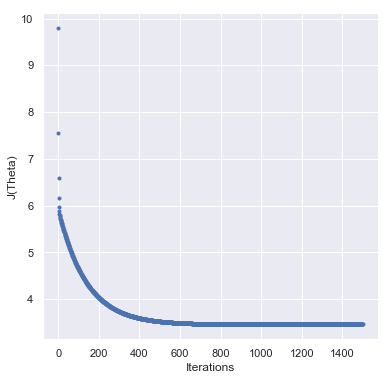

In [22]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(1500),cost_history,'b.')

In [23]:
theta_history

array([[ 0.93071117,  0.4969104 ],
       [ 0.94512515,  0.82884664],
       [ 0.90493844,  0.61495841],
       ...,
       [-4.18857487,  1.21125072],
       [-4.18865769,  1.21125901],
       [-4.1887402 ,  1.21126728]])

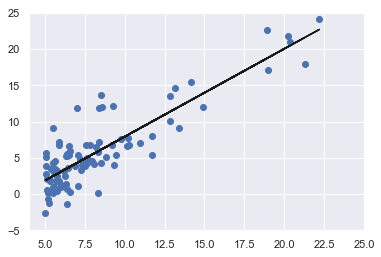

In [24]:
for i in range(x.shape[1]):
        y_predict = theta[0] + theta[1]*x 
pylab.plot(x[:,1],y,'o')
pylab.plot(x,y_predict,'k-')
plt.axis([4,25,-5,25])
pylab.show()